<a href="https://colab.research.google.com/github/ProgrammerMahin/ML_Projects/blob/main/Biogas_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style= 'whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 30, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab_datasets/capstone-forecast/all_breakdown.csv',
                 parse_dates=['TIMESTAMP'],
                index_col="TIMESTAMP")

In [5]:
df.head()

,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
TIMESTAMP,,,,,,,,,
2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,0.0,NaN,NaN,1607.0
2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,0.0,NaN,NaN,1619.0
2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,0.0,NaN,NaN,1660.0
2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,0.0,NaN,NaN,1633.0
2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,0.0,NaN,NaN,1520.0


In [6]:
df.describe()

,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
count,67584.000000,67584.000000,67584.000000,67584.000000,67584.000000,22680.000000,44904.000000,44904.000000,67584.000000
mean,178.976344,303.230398,958.105921,12.500000,314.210193,162.843757,1647.195706,117.254521,1286.506480
std,21.973677,63.519555,82.680911,6.922238,130.469725,226.374400,2390.975782,188.736880,1037.714482
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-21.000000
25%,163.000000,253.000000,899.000000,6.750000,214.000000,0.000000,0.000000,0.000000,368.000000
50%,178.000000,310.000000,963.000000,12.500000,309.000000,29.000000,3.000000,0.000000,1072.000000
75%,196.000000,354.000000,1019.000000,18.250000,407.000000,281.250000,2955.000000,213.000000,1976.000000
max,248.000000,455.000000,1230.000000,24.000000,678.000000,1069.000000,9373.000000,725.000000,4914.000000


In [7]:
df=df.drop(columns='Hour',axis=1)

In [8]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [9]:
df=df.fillna(df.mean())
df

,BIOGAS,BIOMASS,GEOTHERMAL,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL,hour,day_of_month,day_of_week,month
TIMESTAMP,,,,,,,,,,,,
2011-07-21 00:00:00,177.0,372.0,984.0,516.0,0.000000,1647.195706,117.254521,1607.0,0,21,3,7
2011-07-21 01:00:00,176.0,373.0,984.0,509.0,0.000000,1647.195706,117.254521,1619.0,1,21,3,7
2011-07-21 02:00:00,177.0,371.0,985.0,506.0,0.000000,1647.195706,117.254521,1660.0,2,21,3,7
2011-07-21 03:00:00,177.0,374.0,985.0,504.0,0.000000,1647.195706,117.254521,1633.0,3,21,3,7
2011-07-21 04:00:00,177.0,377.0,984.0,508.0,0.000000,1647.195706,117.254521,1520.0,4,21,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-28 19:00:00,209.0,331.0,924.0,404.0,162.843757,0.000000,0.000000,2633.0,19,28,0,1
2013-01-28 20:00:00,207.0,334.0,924.0,372.0,162.843757,0.000000,0.000000,2540.0,20,28,0,1
2013-01-28 21:00:00,208.0,342.0,926.0,372.0,162.843757,0.000000,0.000000,2408.0,21,28,0,1


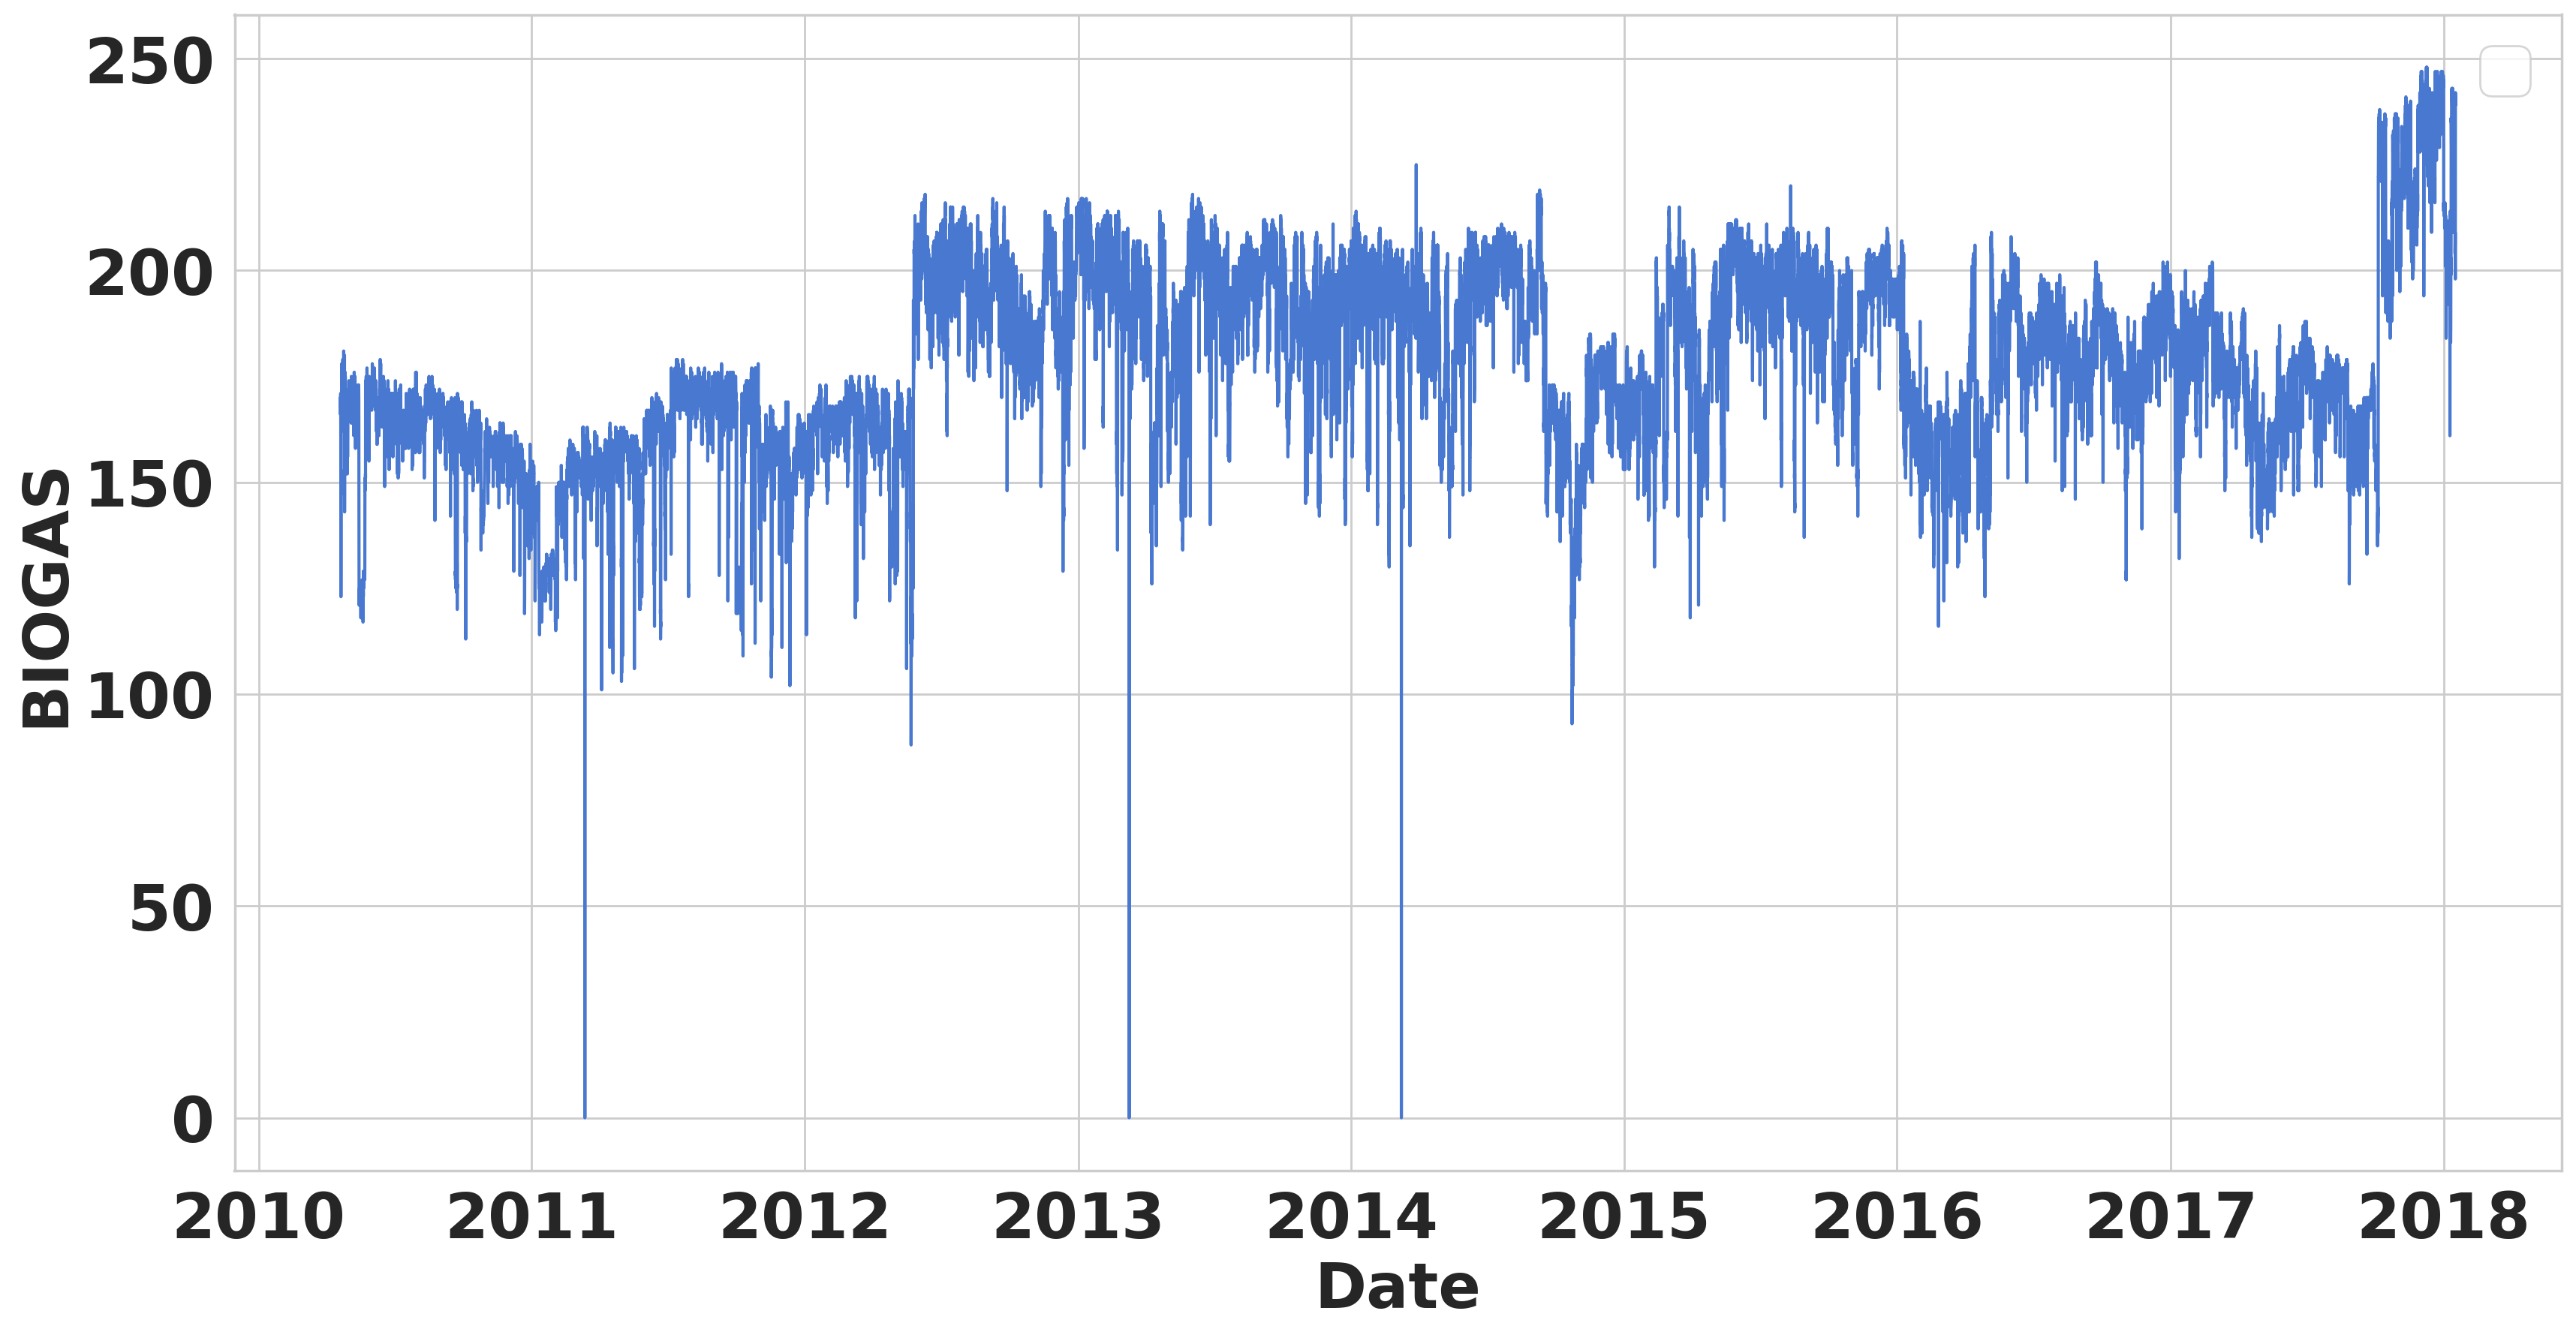

In [10]:
rcParams['figure.figsize'] = 20, 10
sns.lineplot(x=df.index, y='BIOGAS', data=df)
plt.xlabel('Date', fontsize=30, fontweight='bold')
plt.ylabel('BIOGAS', fontsize=30, fontweight='bold')
plt.legend( fontsize =30)
from pylab import *

fontsize = 30
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.savefig('/content/drive/MyDrive/capstone/forecast/forecast/1.pdf', dpi=300)

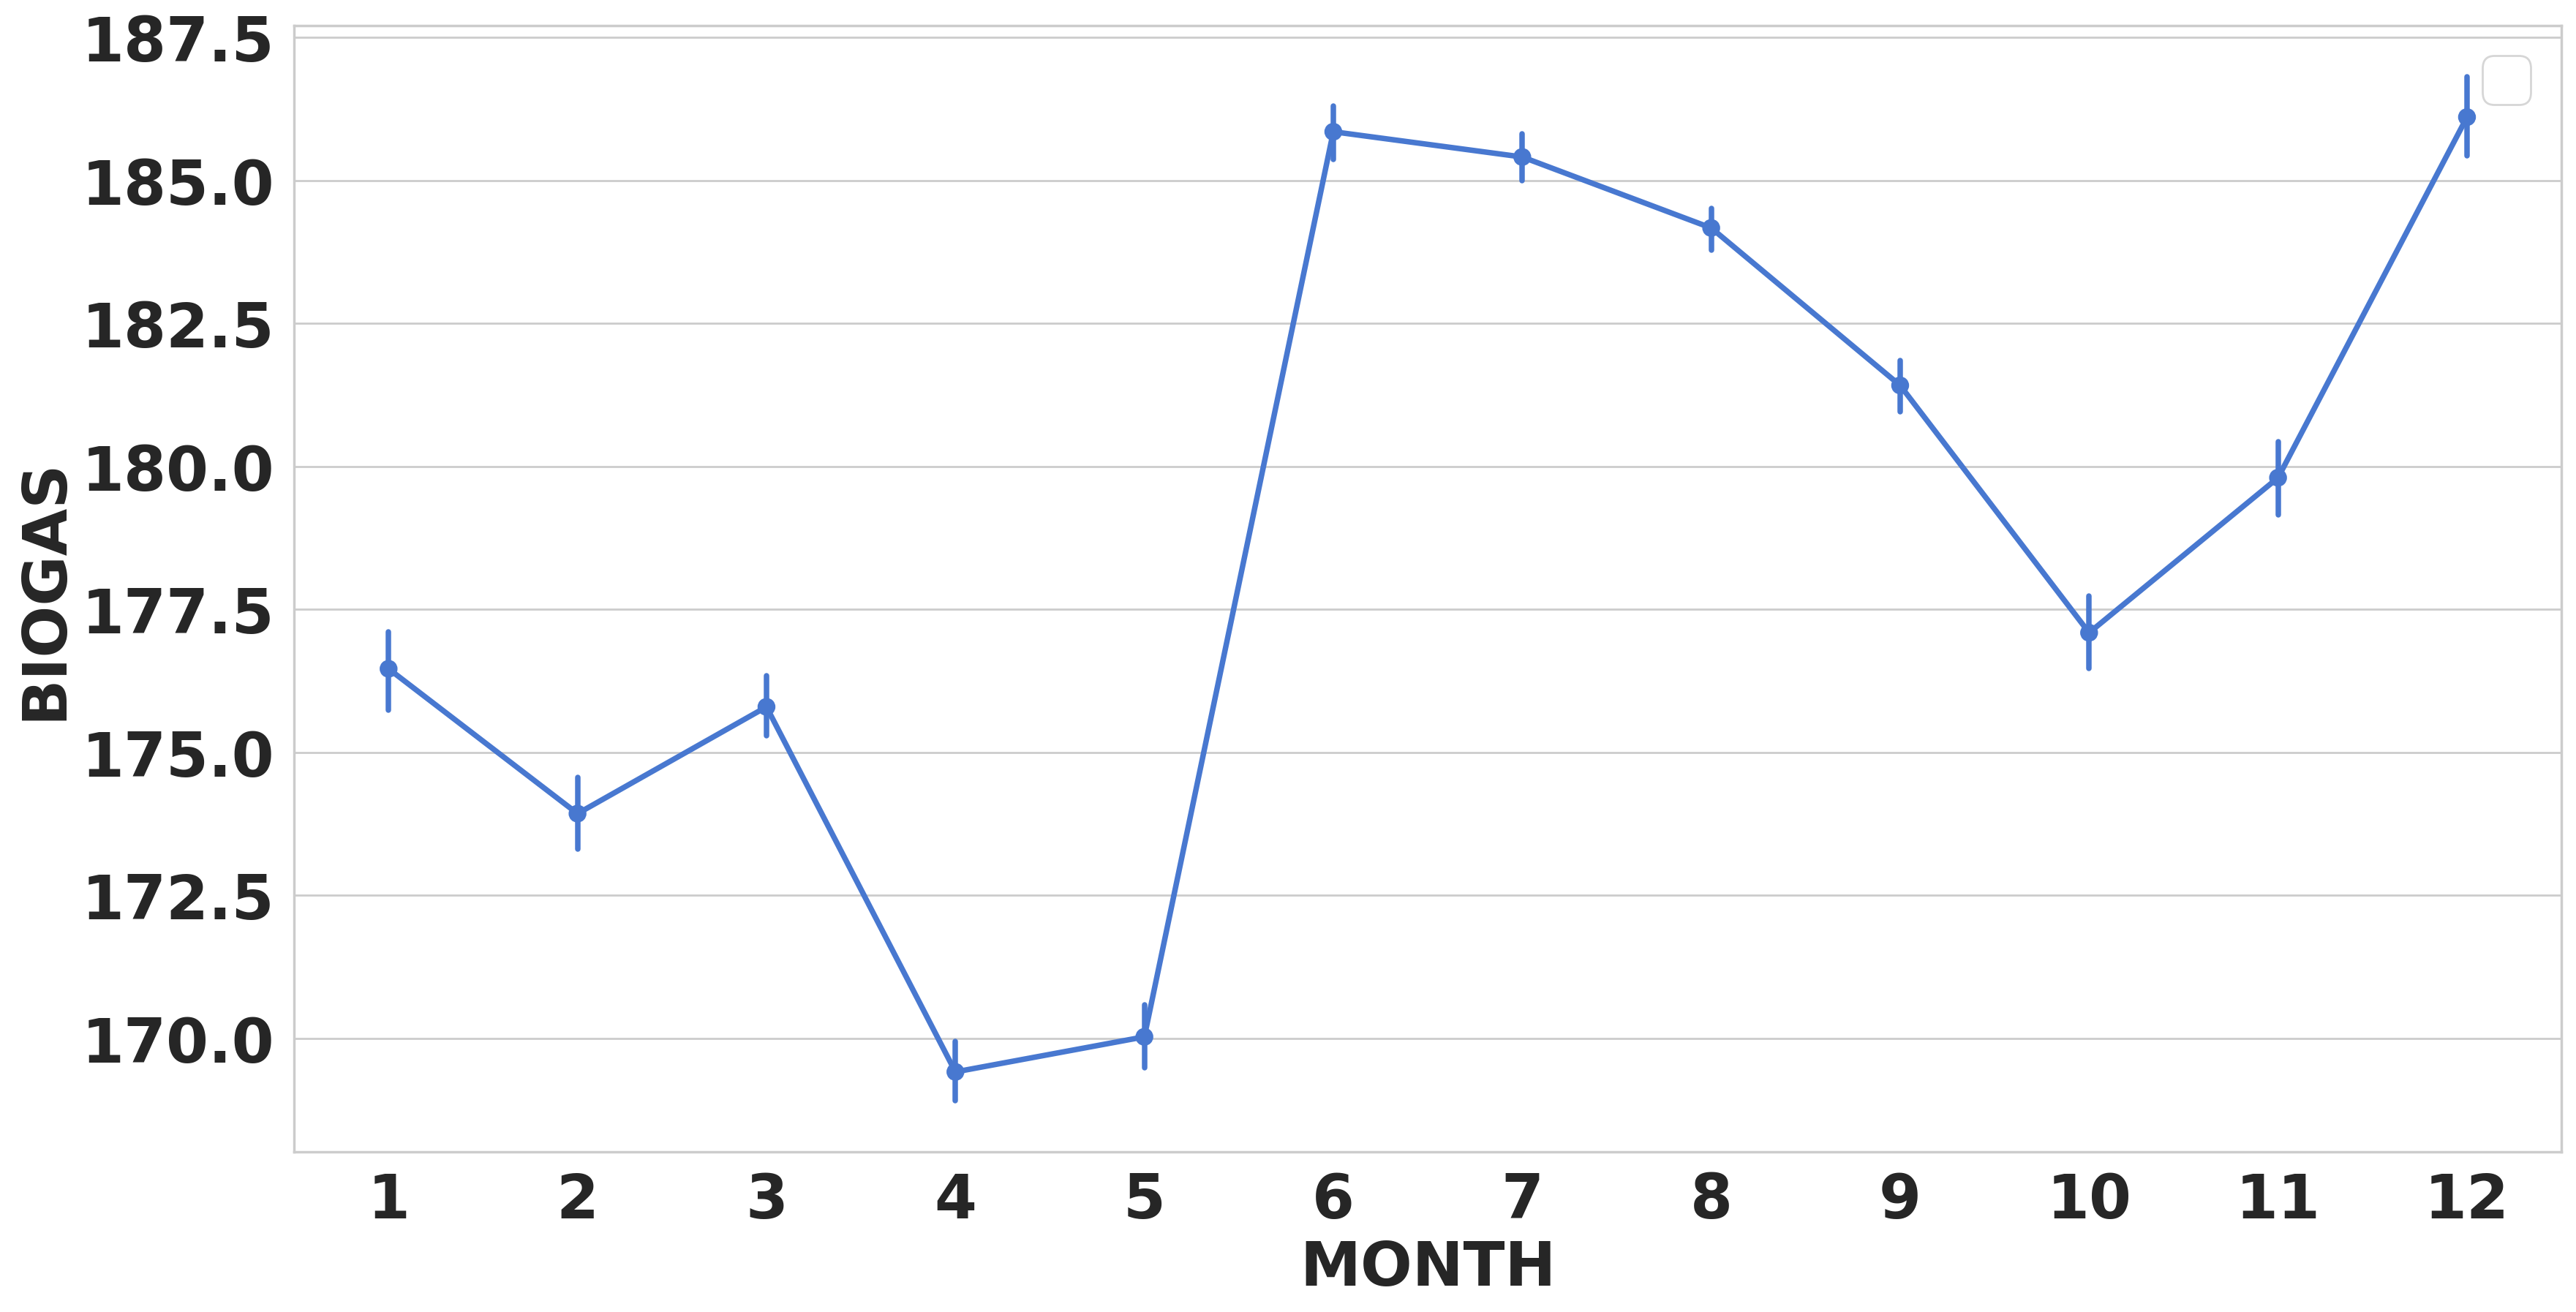

In [11]:
sns.pointplot(x=df.month, y='BIOGAS', data=df)
plt.xlabel('MONTH', fontsize=30, fontweight='bold')
plt.ylabel('BIOGAS', fontsize=30, fontweight='bold')
plt.legend( fontsize =30)
from pylab import *

fontsize = 30
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.savefig('/content/drive/MyDrive/capstone/forecast/forecast/2.pdf', dpi=300)

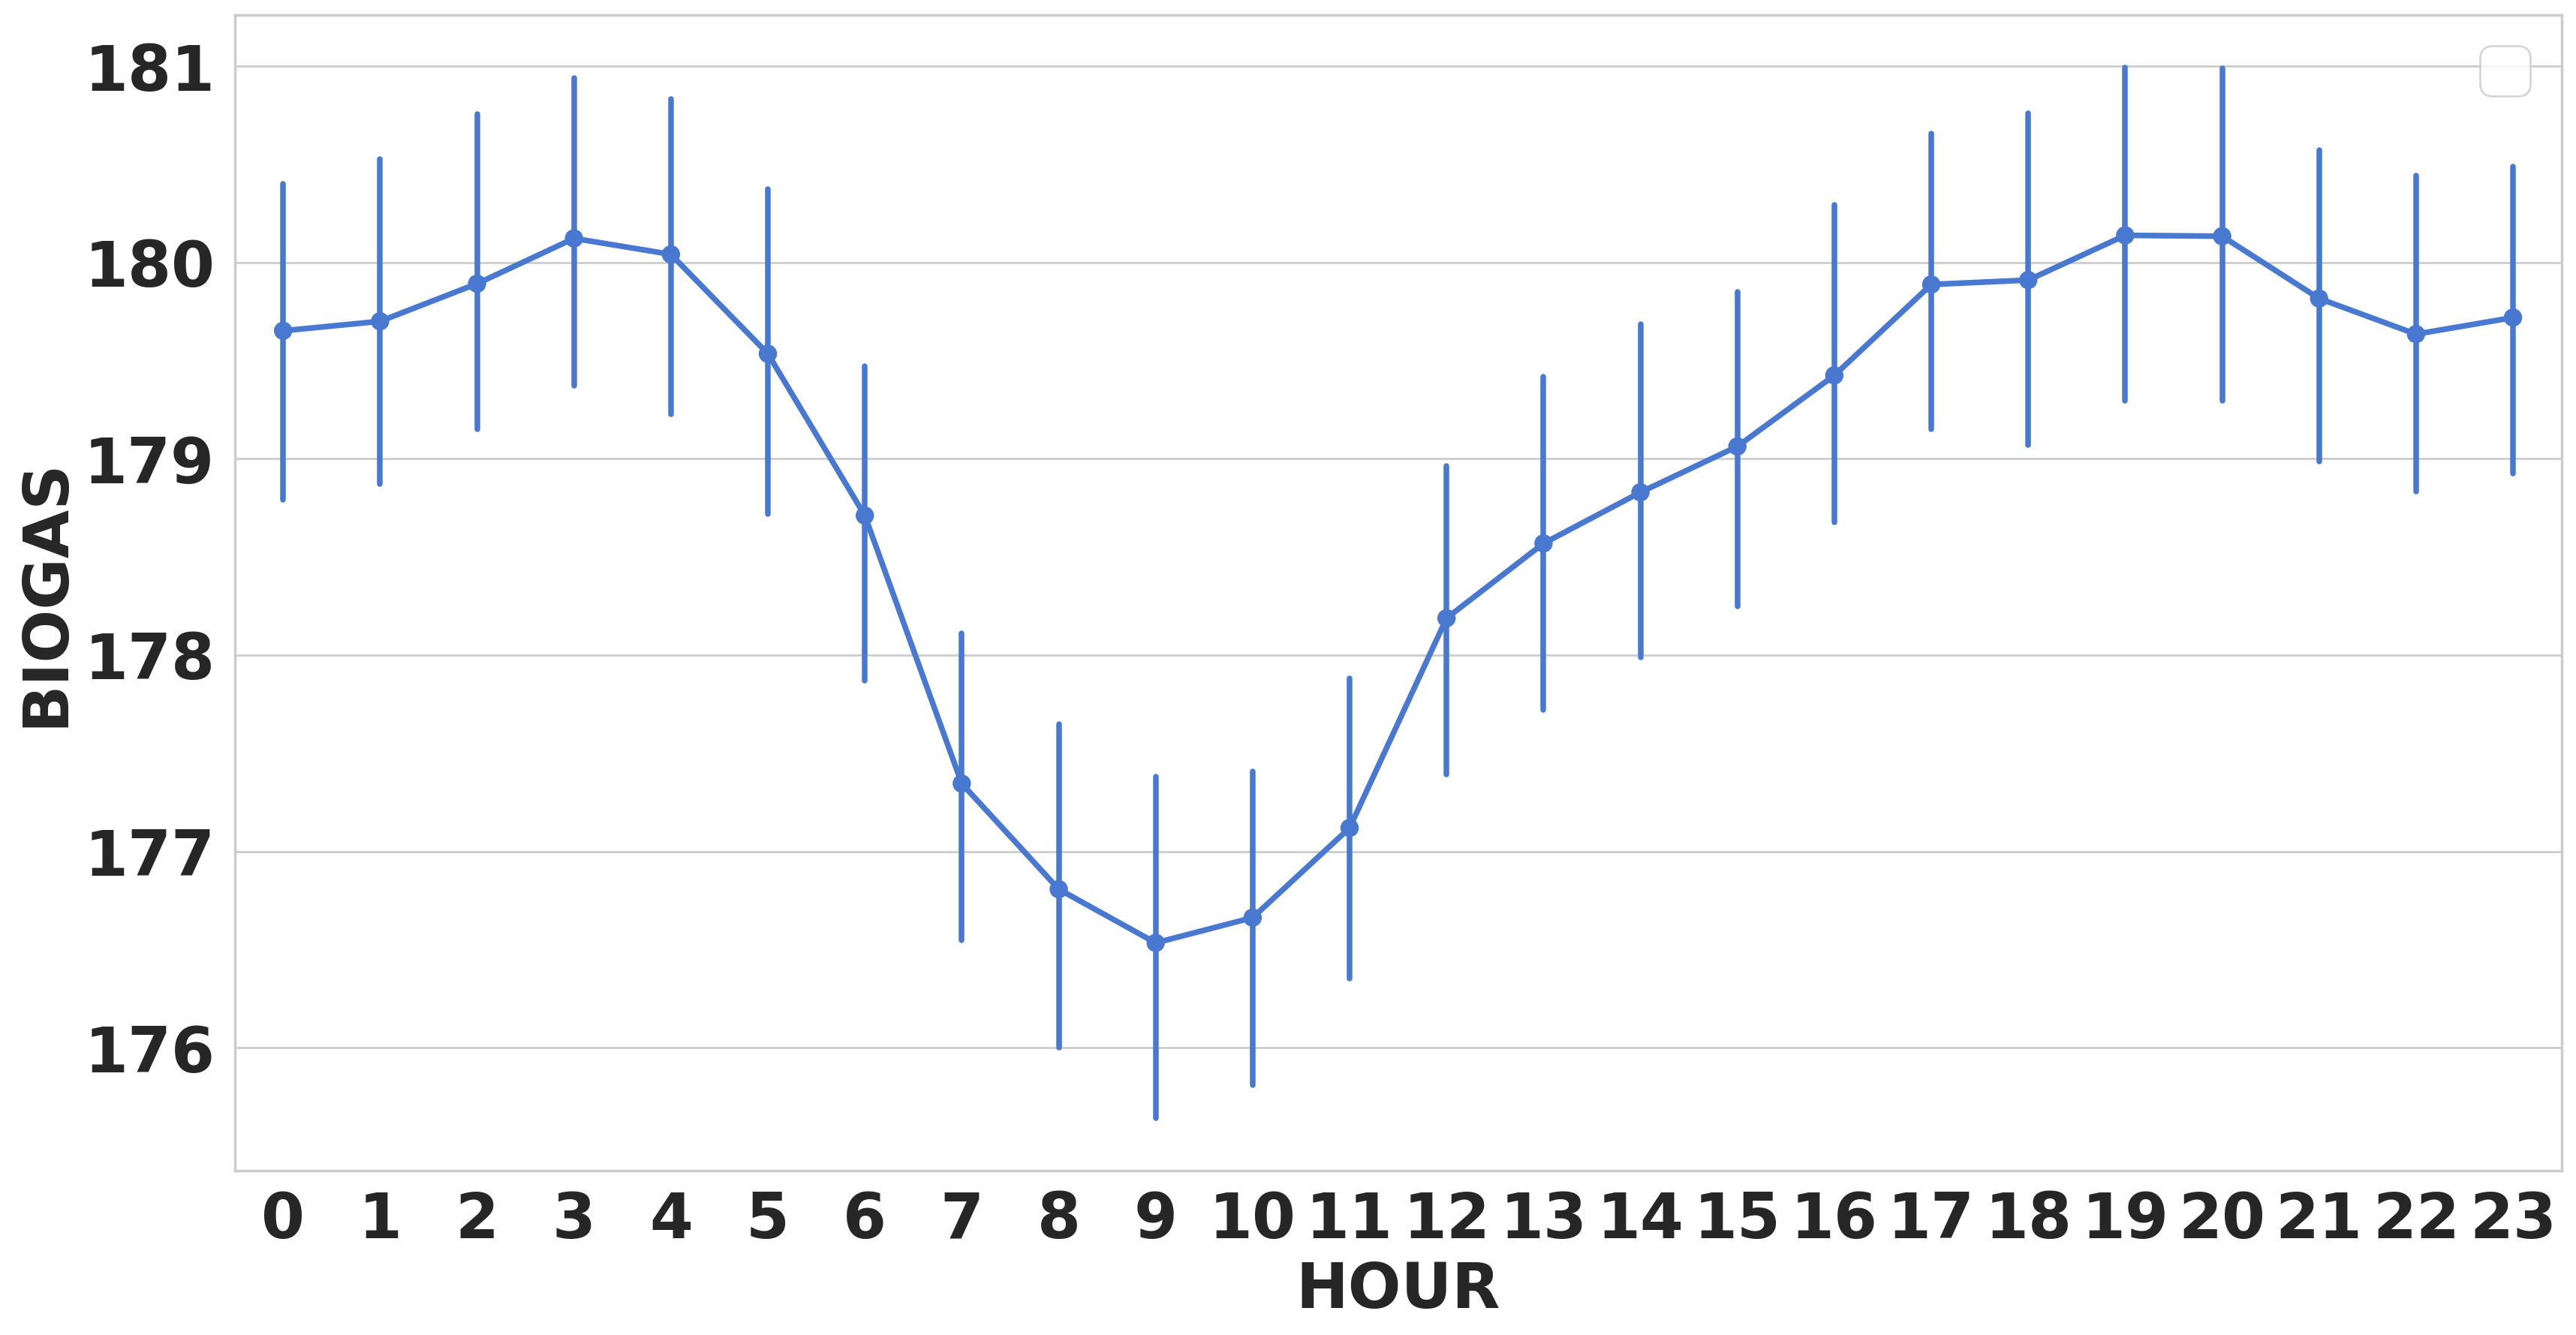

In [12]:
sns.pointplot(x=df.hour, y='BIOGAS', data=df)
plt.xlabel('HOUR', fontsize=30, fontweight='bold')
plt.ylabel('BIOGAS', fontsize=30, fontweight='bold')
plt.legend( fontsize =30)
from pylab import *

fontsize = 30
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.savefig('/content/drive/MyDrive/capstone/forecast/forecast/3.pdf', dpi=300)

In [13]:
# sns.pointplot(x=df.hour, y='BIOGAS', data=df, hue='SOLAR')
# plt.savefig('/content/drive/MyDrive/capstone/forecast/4.pdf', dpi=300)

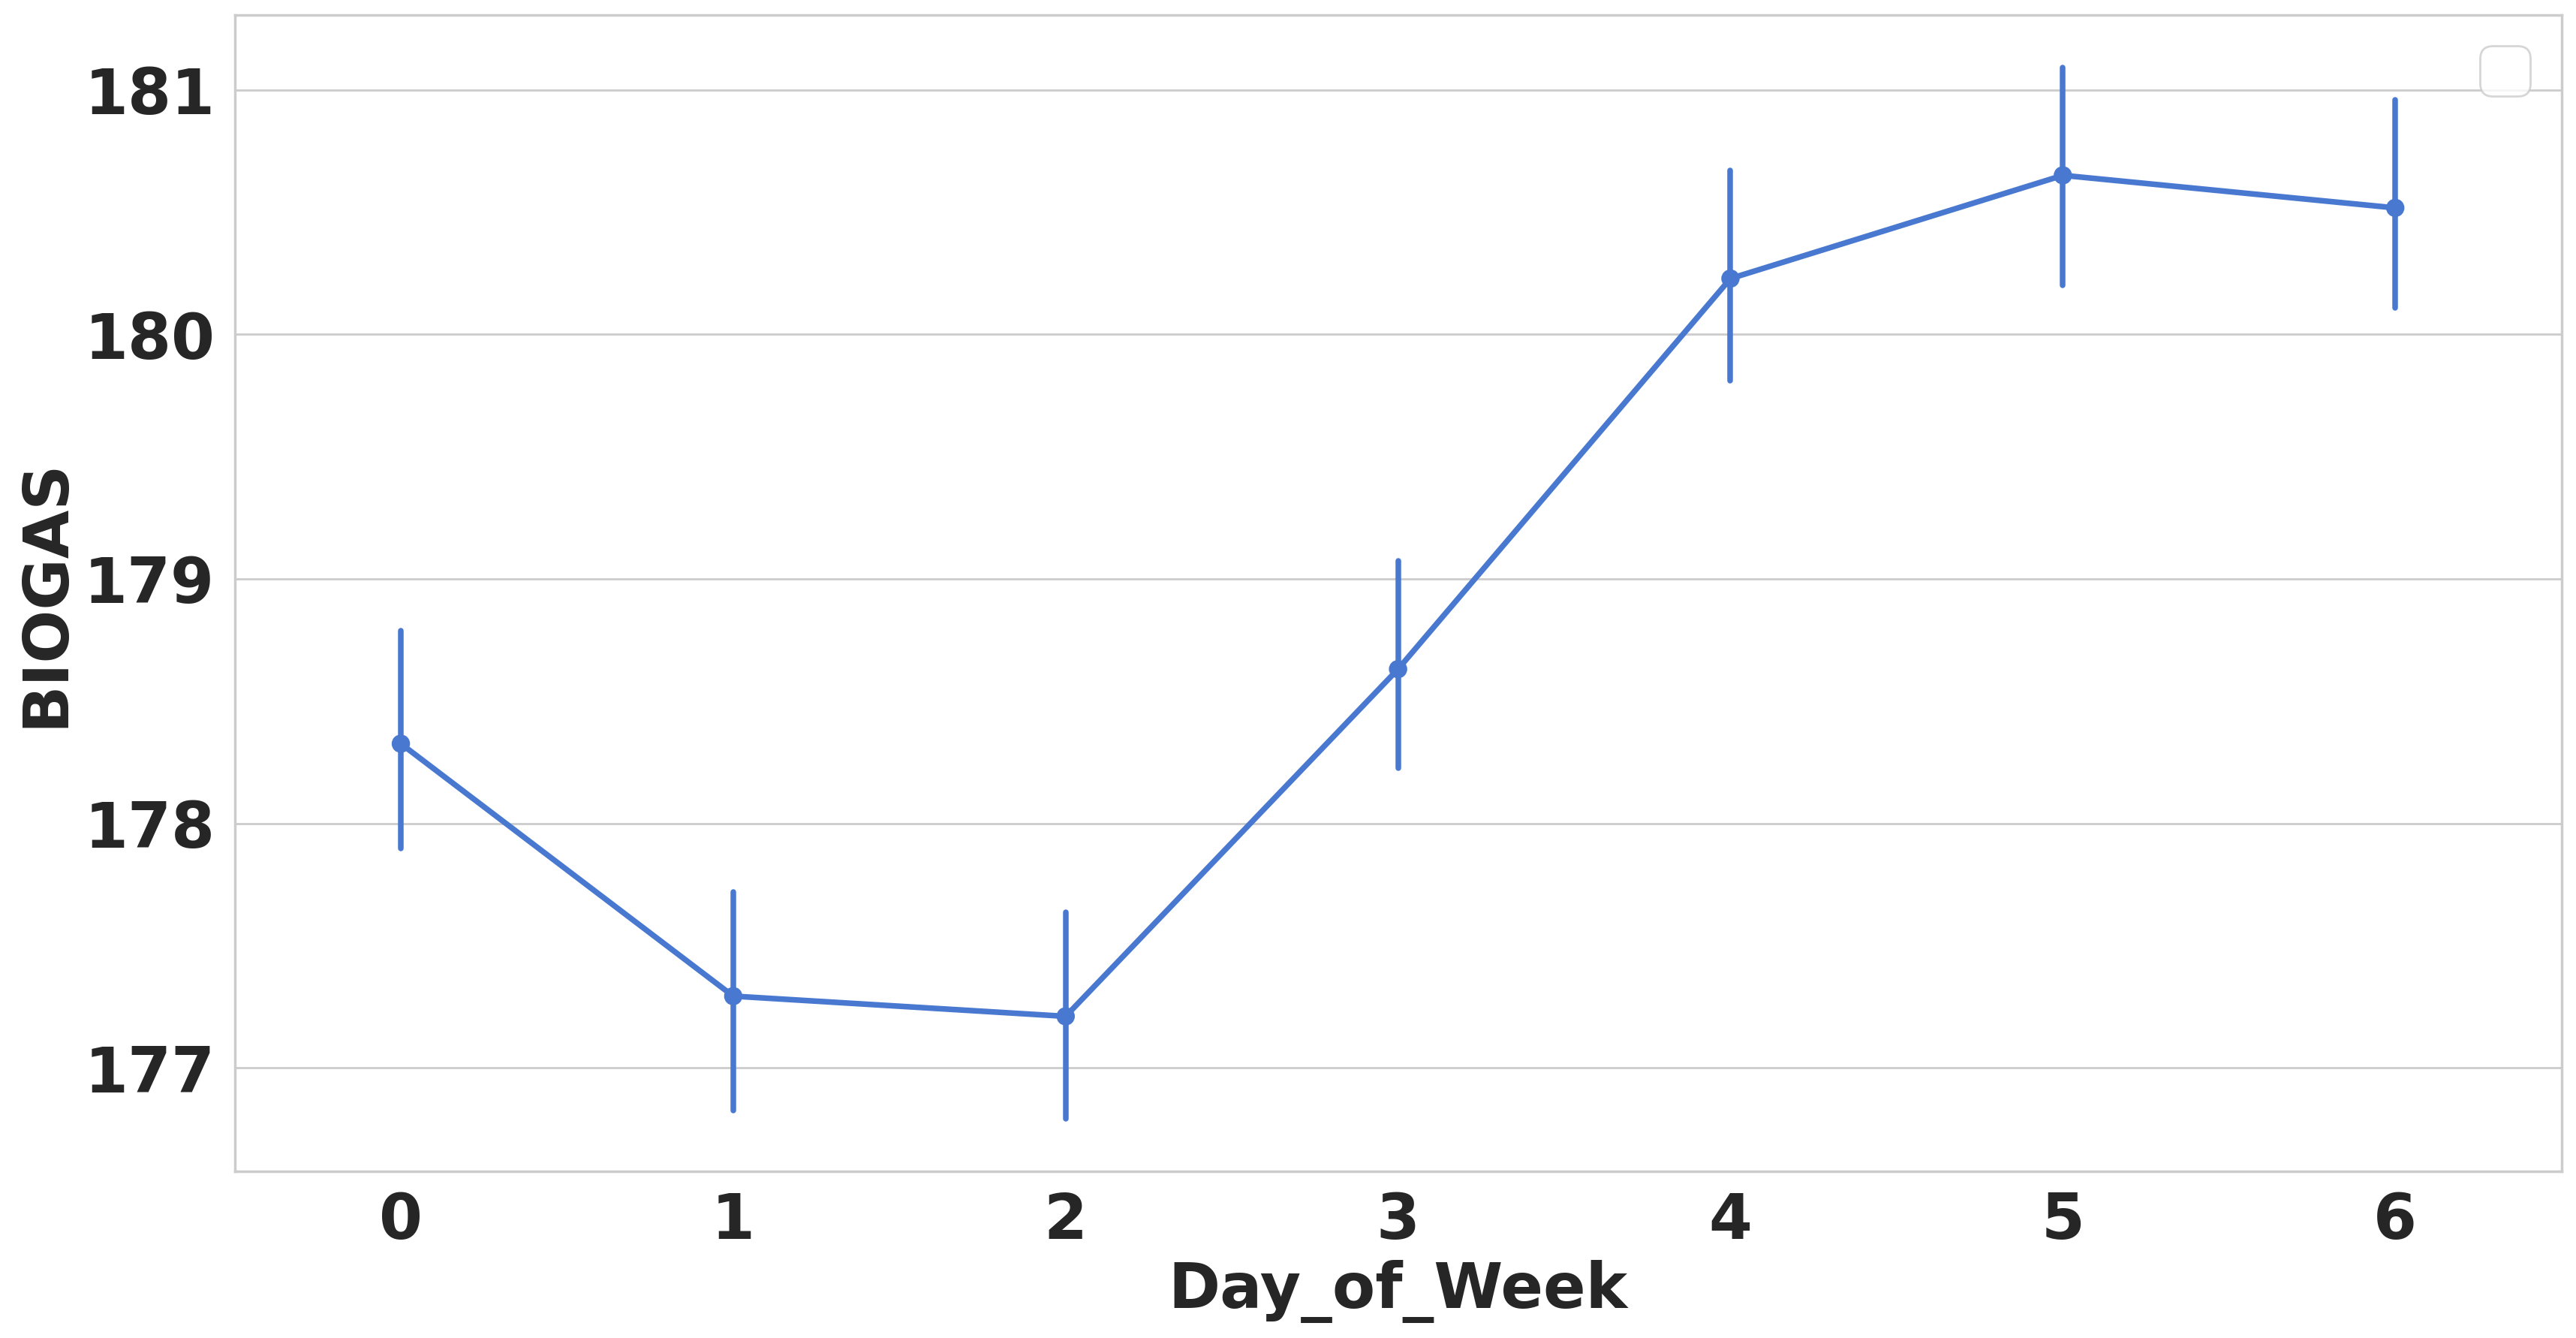

In [14]:
sns.pointplot(x=df.day_of_week, y='BIOGAS', data=df)
plt.xlabel('Day_of_Week', fontsize=30, fontweight='bold')
plt.ylabel('BIOGAS', fontsize=30, fontweight='bold')
plt.legend( fontsize =30)
from pylab import *

fontsize = 30
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.savefig('/content/drive/MyDrive/capstone/forecast/forecast/5.pdf', dpi=300)

In [15]:
train_size = int(len(df) * 0.95)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(64204, 12) (3380, 12)


In [16]:
df.columns

Index(['BIOGAS', 'BIOMASS', 'GEOTHERMAL', 'SMALL HYDRO', 'SOLAR', 'SOLAR PV',
       'SOLAR THERMAL', 'WIND TOTAL', 'hour', 'day_of_month', 'day_of_week',
       'month'],
      dtype='object')

In [17]:
from sklearn.preprocessing import RobustScaler
f_columns = ['BIOMASS', 'GEOTHERMAL', 'SMALL HYDRO', 'SOLAR', 'SOLAR PV',
       'SOLAR THERMAL', 'WIND TOTAL']
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

<ipython-input-17-f060524a43aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, f_columns] = f_transformer.transform(
<ipython-input-17-f060524a43aa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, f_columns] = f_transformer.transform(


In [18]:
cnt_transformer = RobustScaler()
cnt_transformer = cnt_transformer.fit(train[['BIOGAS']])
train['BIOGAS'] = cnt_transformer.transform(train[['BIOGAS']])
test['BIOGAS'] = cnt_transformer.transform(test[['BIOGAS']])

<ipython-input-18-e58a3903f1d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['BIOGAS'] = cnt_transformer.transform(train[['BIOGAS']])
<ipython-input-18-e58a3903f1d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['BIOGAS'] = cnt_transformer.transform(test[['BIOGAS']])


In [19]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [20]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.BIOGAS, time_steps)
X_test, y_test = create_dataset(test, test.BIOGAS, time_steps)
print(X_train.shape, y_train.shape)

(64194, 10, 12) (64194,)


In [21]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
model.build(input_shape=(None,X_train.shape[1], X_train.shape[2]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              144384    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 144,641
Trainable params: 144,641
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
1806/1806 [==============================] - 21s 7ms/step - loss: 0.2001 - val_loss: 0.0851
Epoch 2/30
1806/1806 [==============================] - 11s 6ms/step - loss: 0.0814 - val_loss: 0.0550
Epoch 3/30
1806/1806 [==============================] - 11s 6ms/step - loss: 0.0607 - val_loss: 0.0500
Epoch 4/30
1806/1806 [==============================] - 12s 7ms/step - loss: 0.0552 - val_loss: 0.0450
Epoch 5/30
1806/1806 [==============================] - 12s 6ms/step - loss: 0.0524 - val_loss: 0.0440
Epoch 6/30
1806/1806 [==============================] - 10s 6ms/step - loss: 0.0493 - val_loss: 0.0423
Epoch 7/30
1806/1806 [==============================] - 11s 6ms/step - loss: 0.0486 - val_loss: 0.0412
Epoch 8/30
1806/1806 [==============================] - 11s 6ms/step - loss: 0.0469 - val_loss: 0.0383
Epoch 9/30
1806/1806 [==============================] - 11s 6ms/step - loss: 0.0458 - val_loss: 0.0386
Epoch 10/30
1806/1806 [==============================] - 11s 6ms/step - l

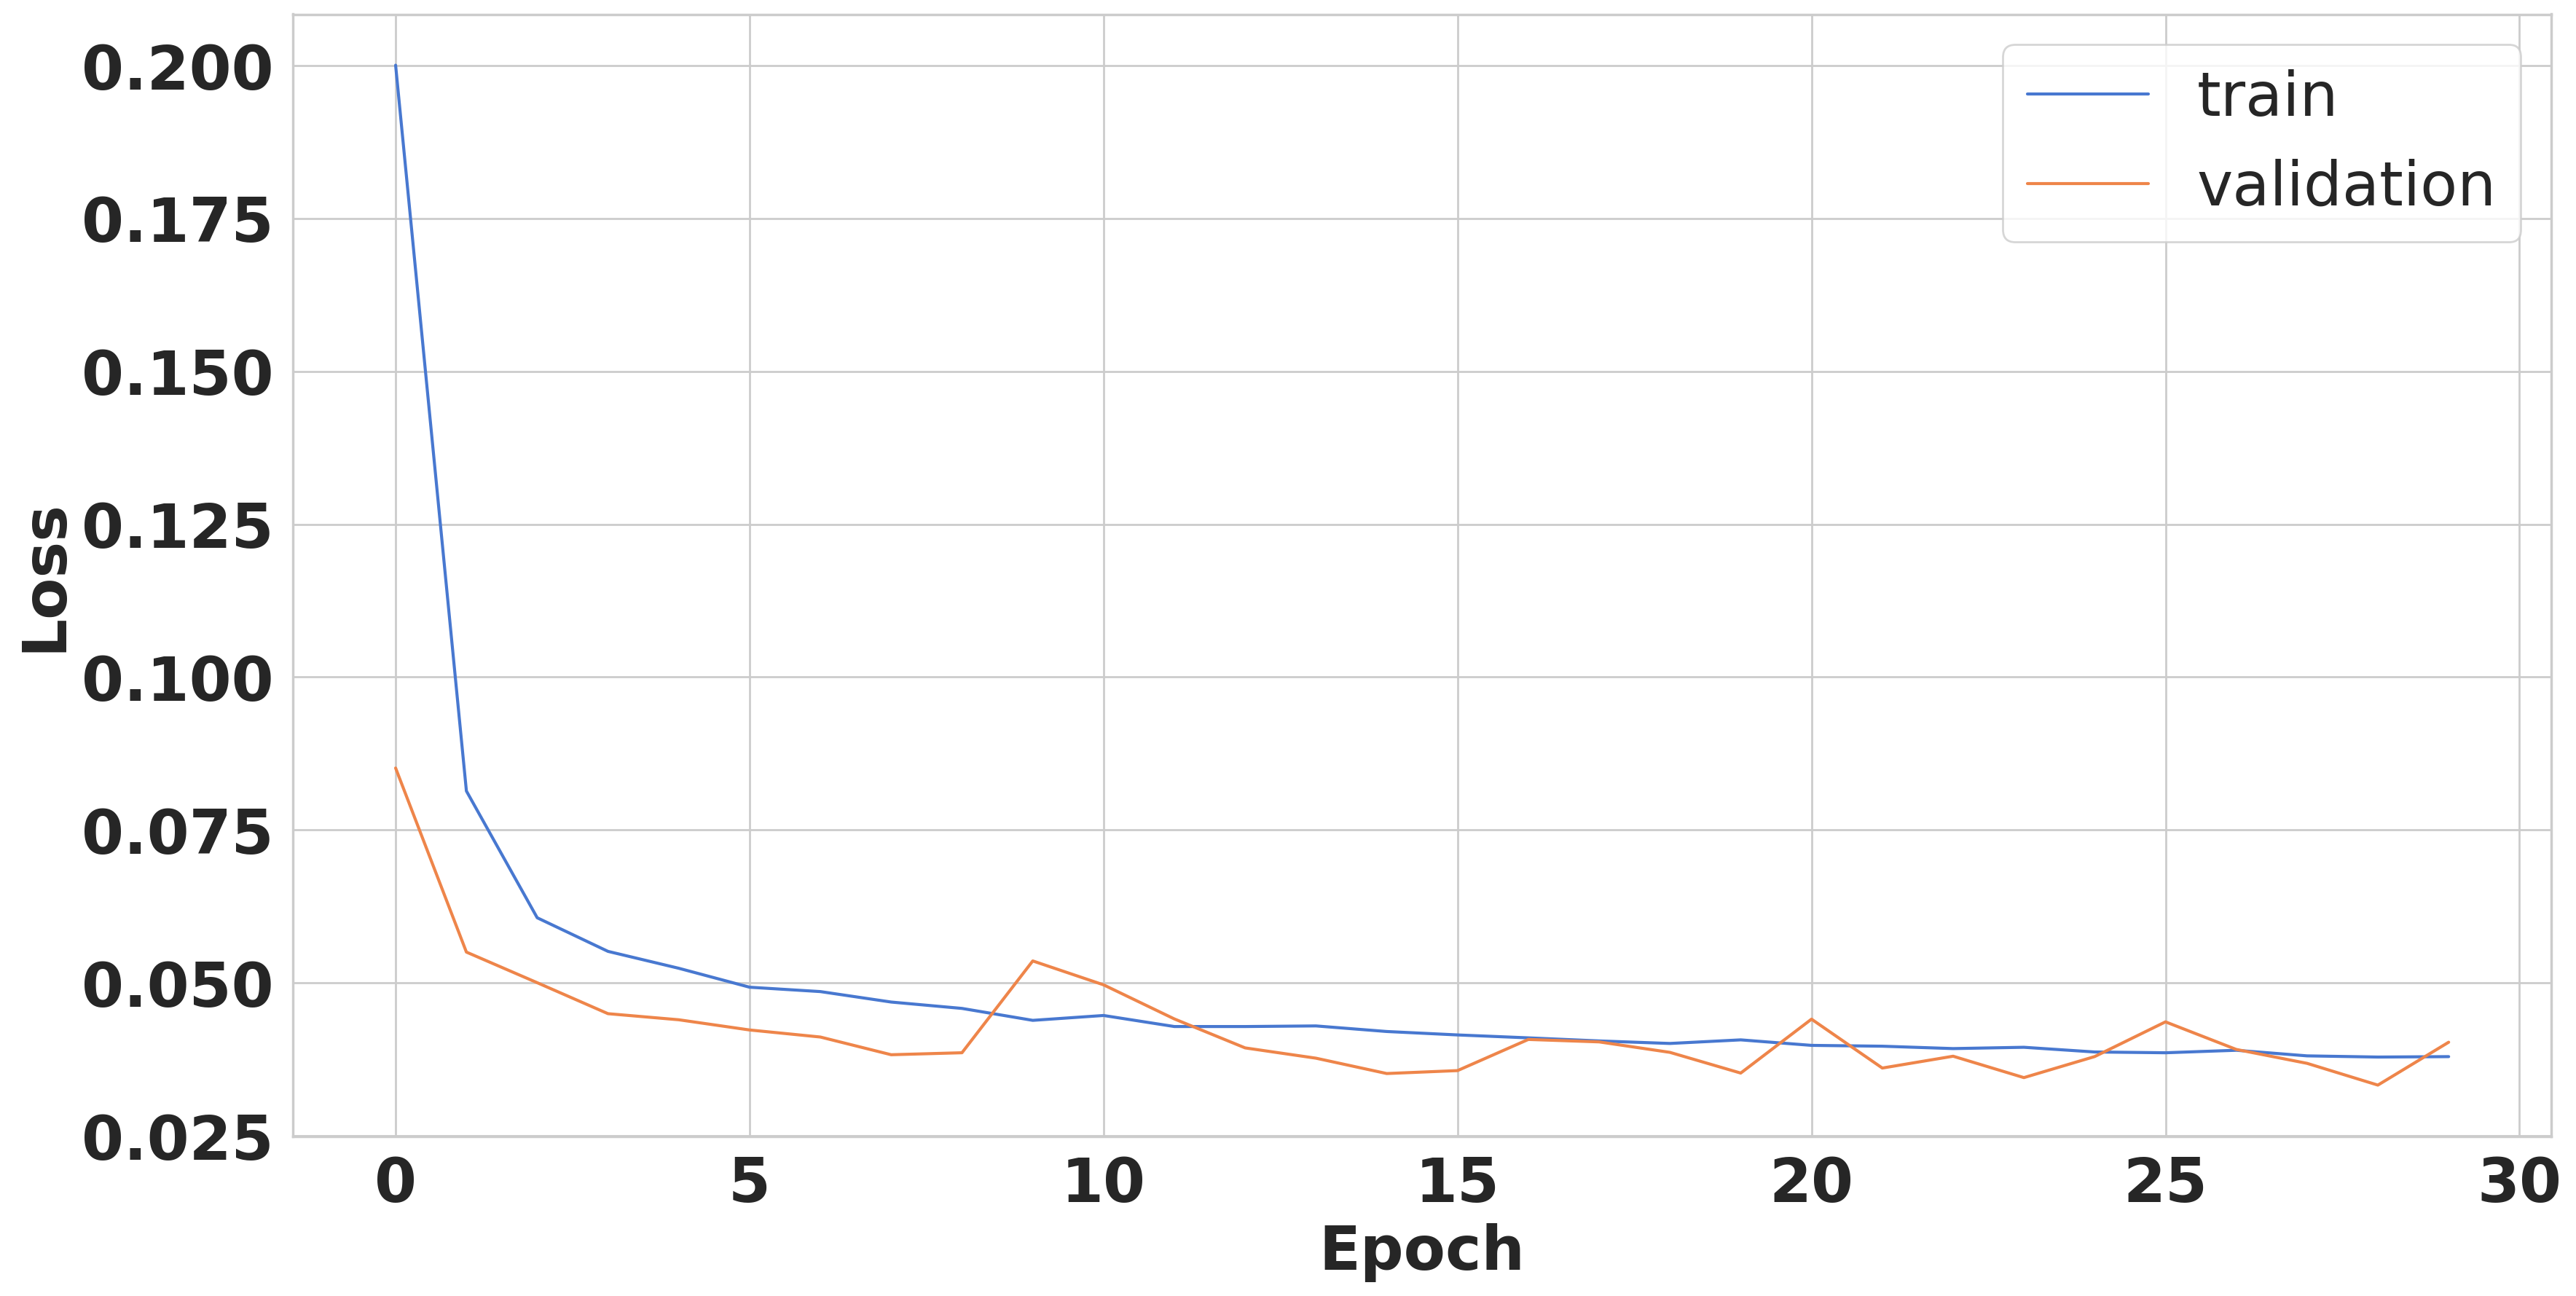

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch', fontsize=30, fontweight='bold')
plt.ylabel('Loss', fontsize=30, fontweight='bold')
plt.legend( fontsize =30)
from pylab import *

fontsize = 30
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.savefig('/content/drive/MyDrive/capstone/forecast/forecast/4.pdf', dpi=300)

In [25]:
y_pred= model.predict(X_test)
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform (y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)


106/106 [==============================] - 1s 2ms/step


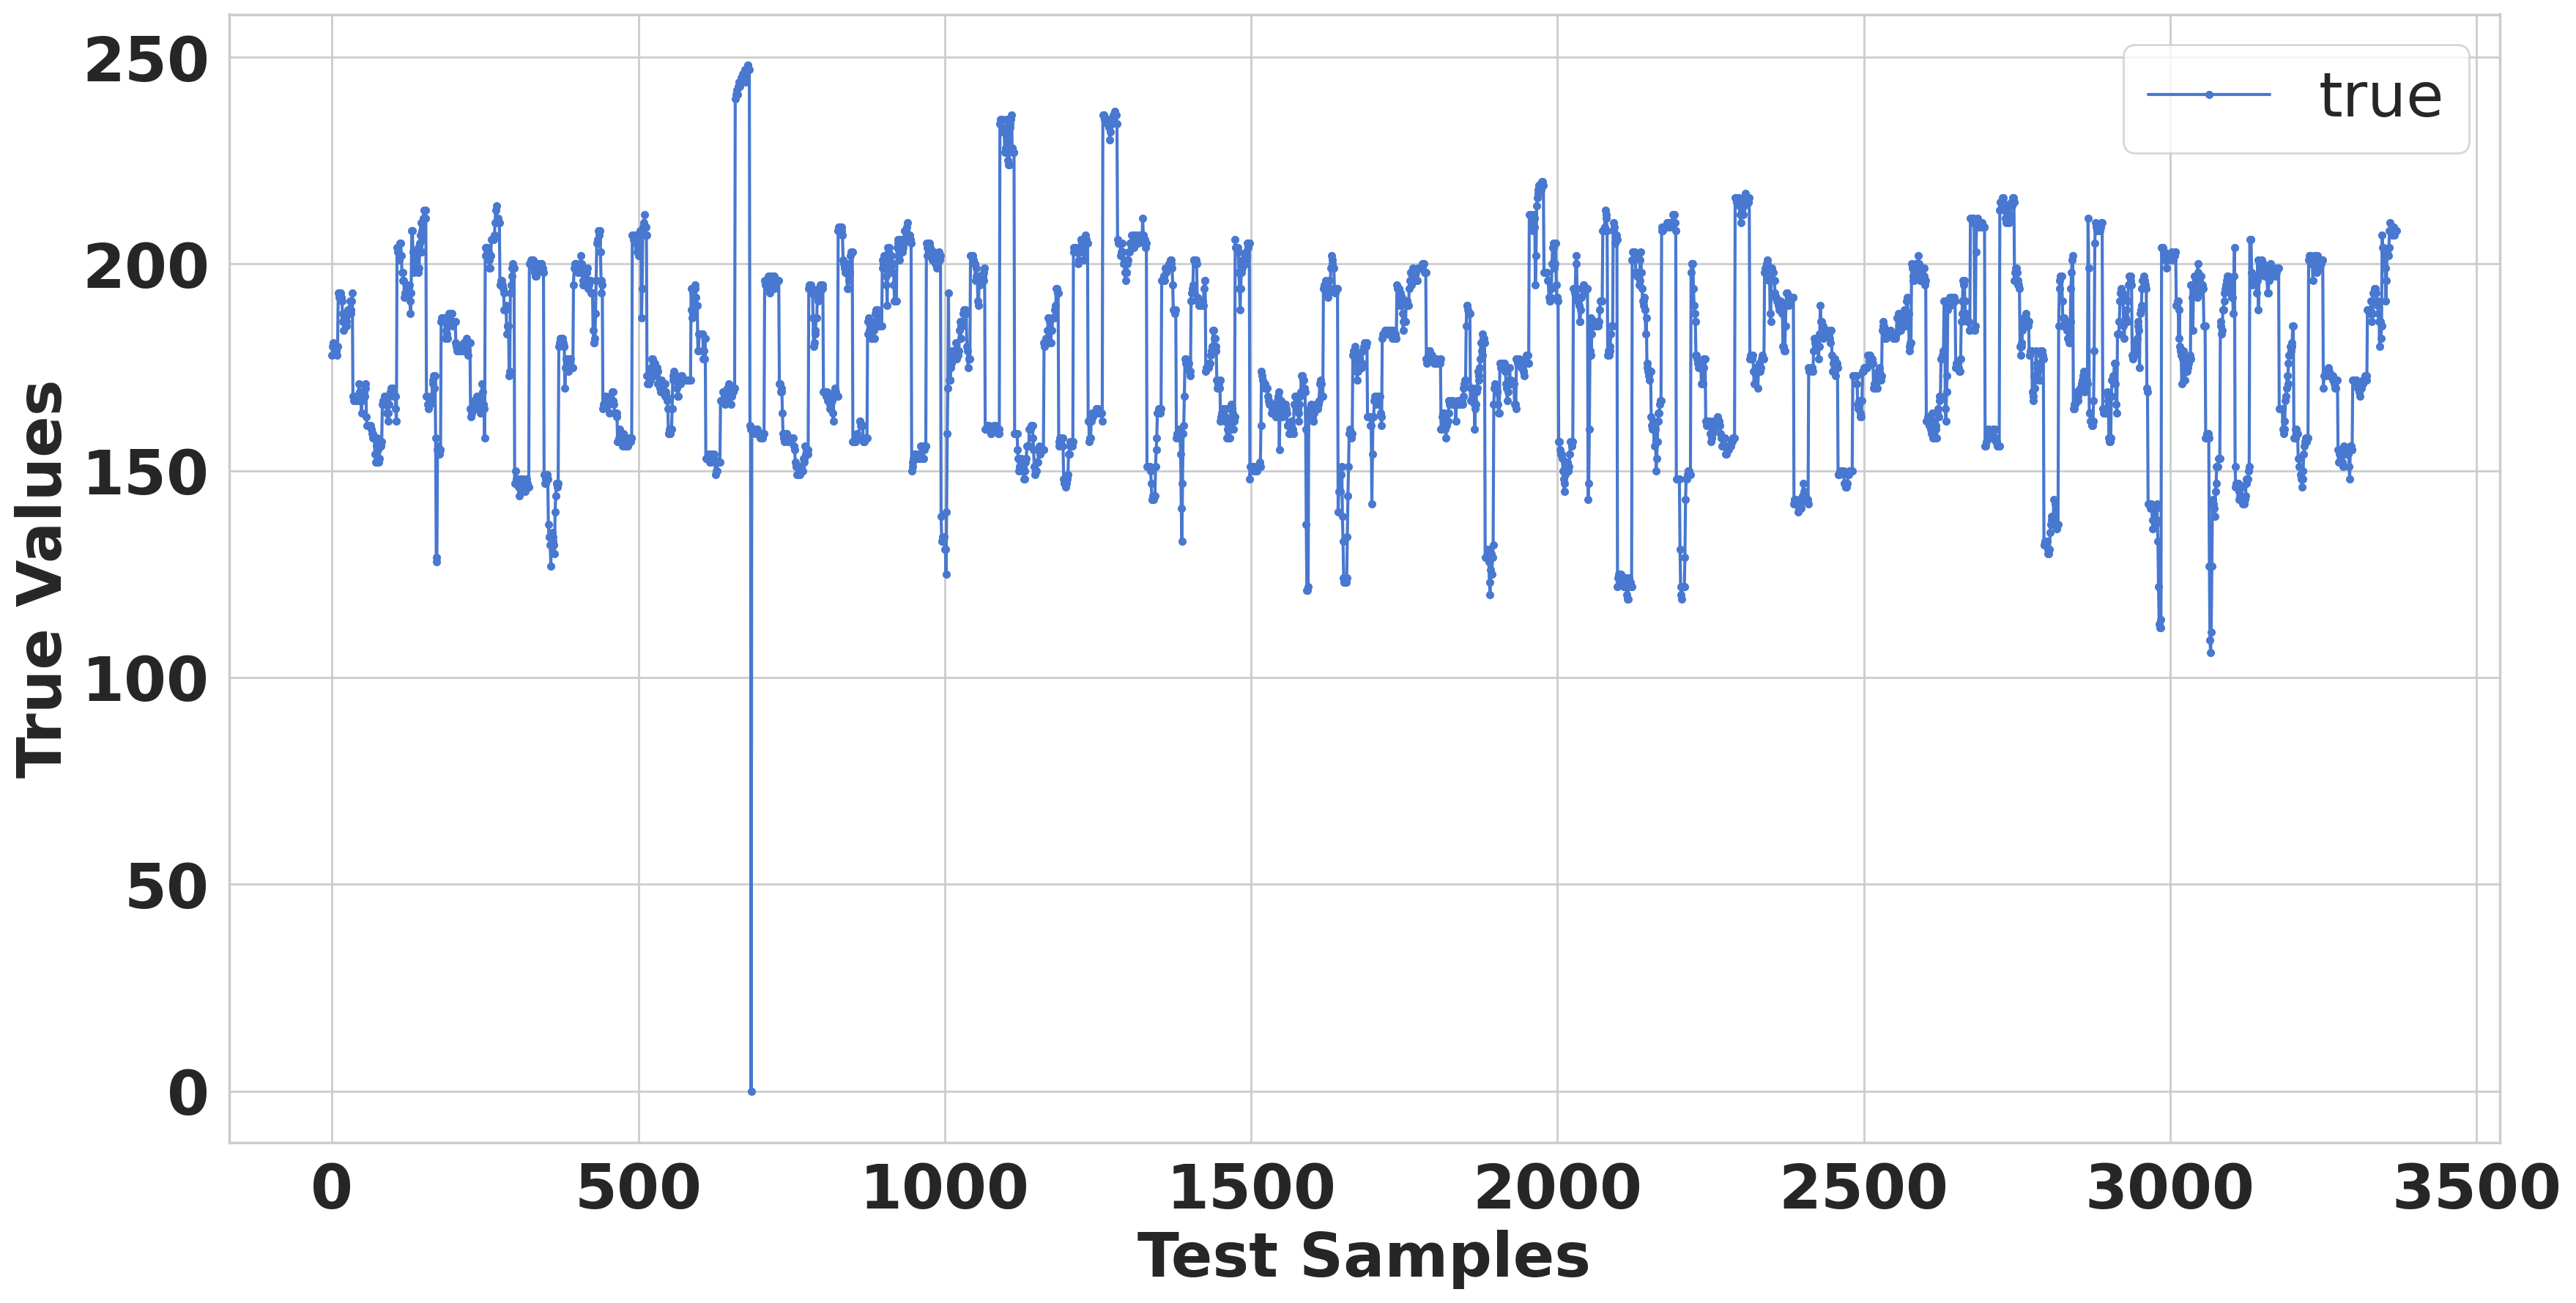

In [26]:
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.xlabel('Test Samples', fontsize=30, fontweight='bold')
plt.ylabel('True Values', fontsize=30, fontweight='bold')
plt.legend( fontsize =30)
from pylab import *

fontsize = 30
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.savefig('/content/drive/MyDrive/capstone/forecast/forecast/6.pdf', dpi=300)

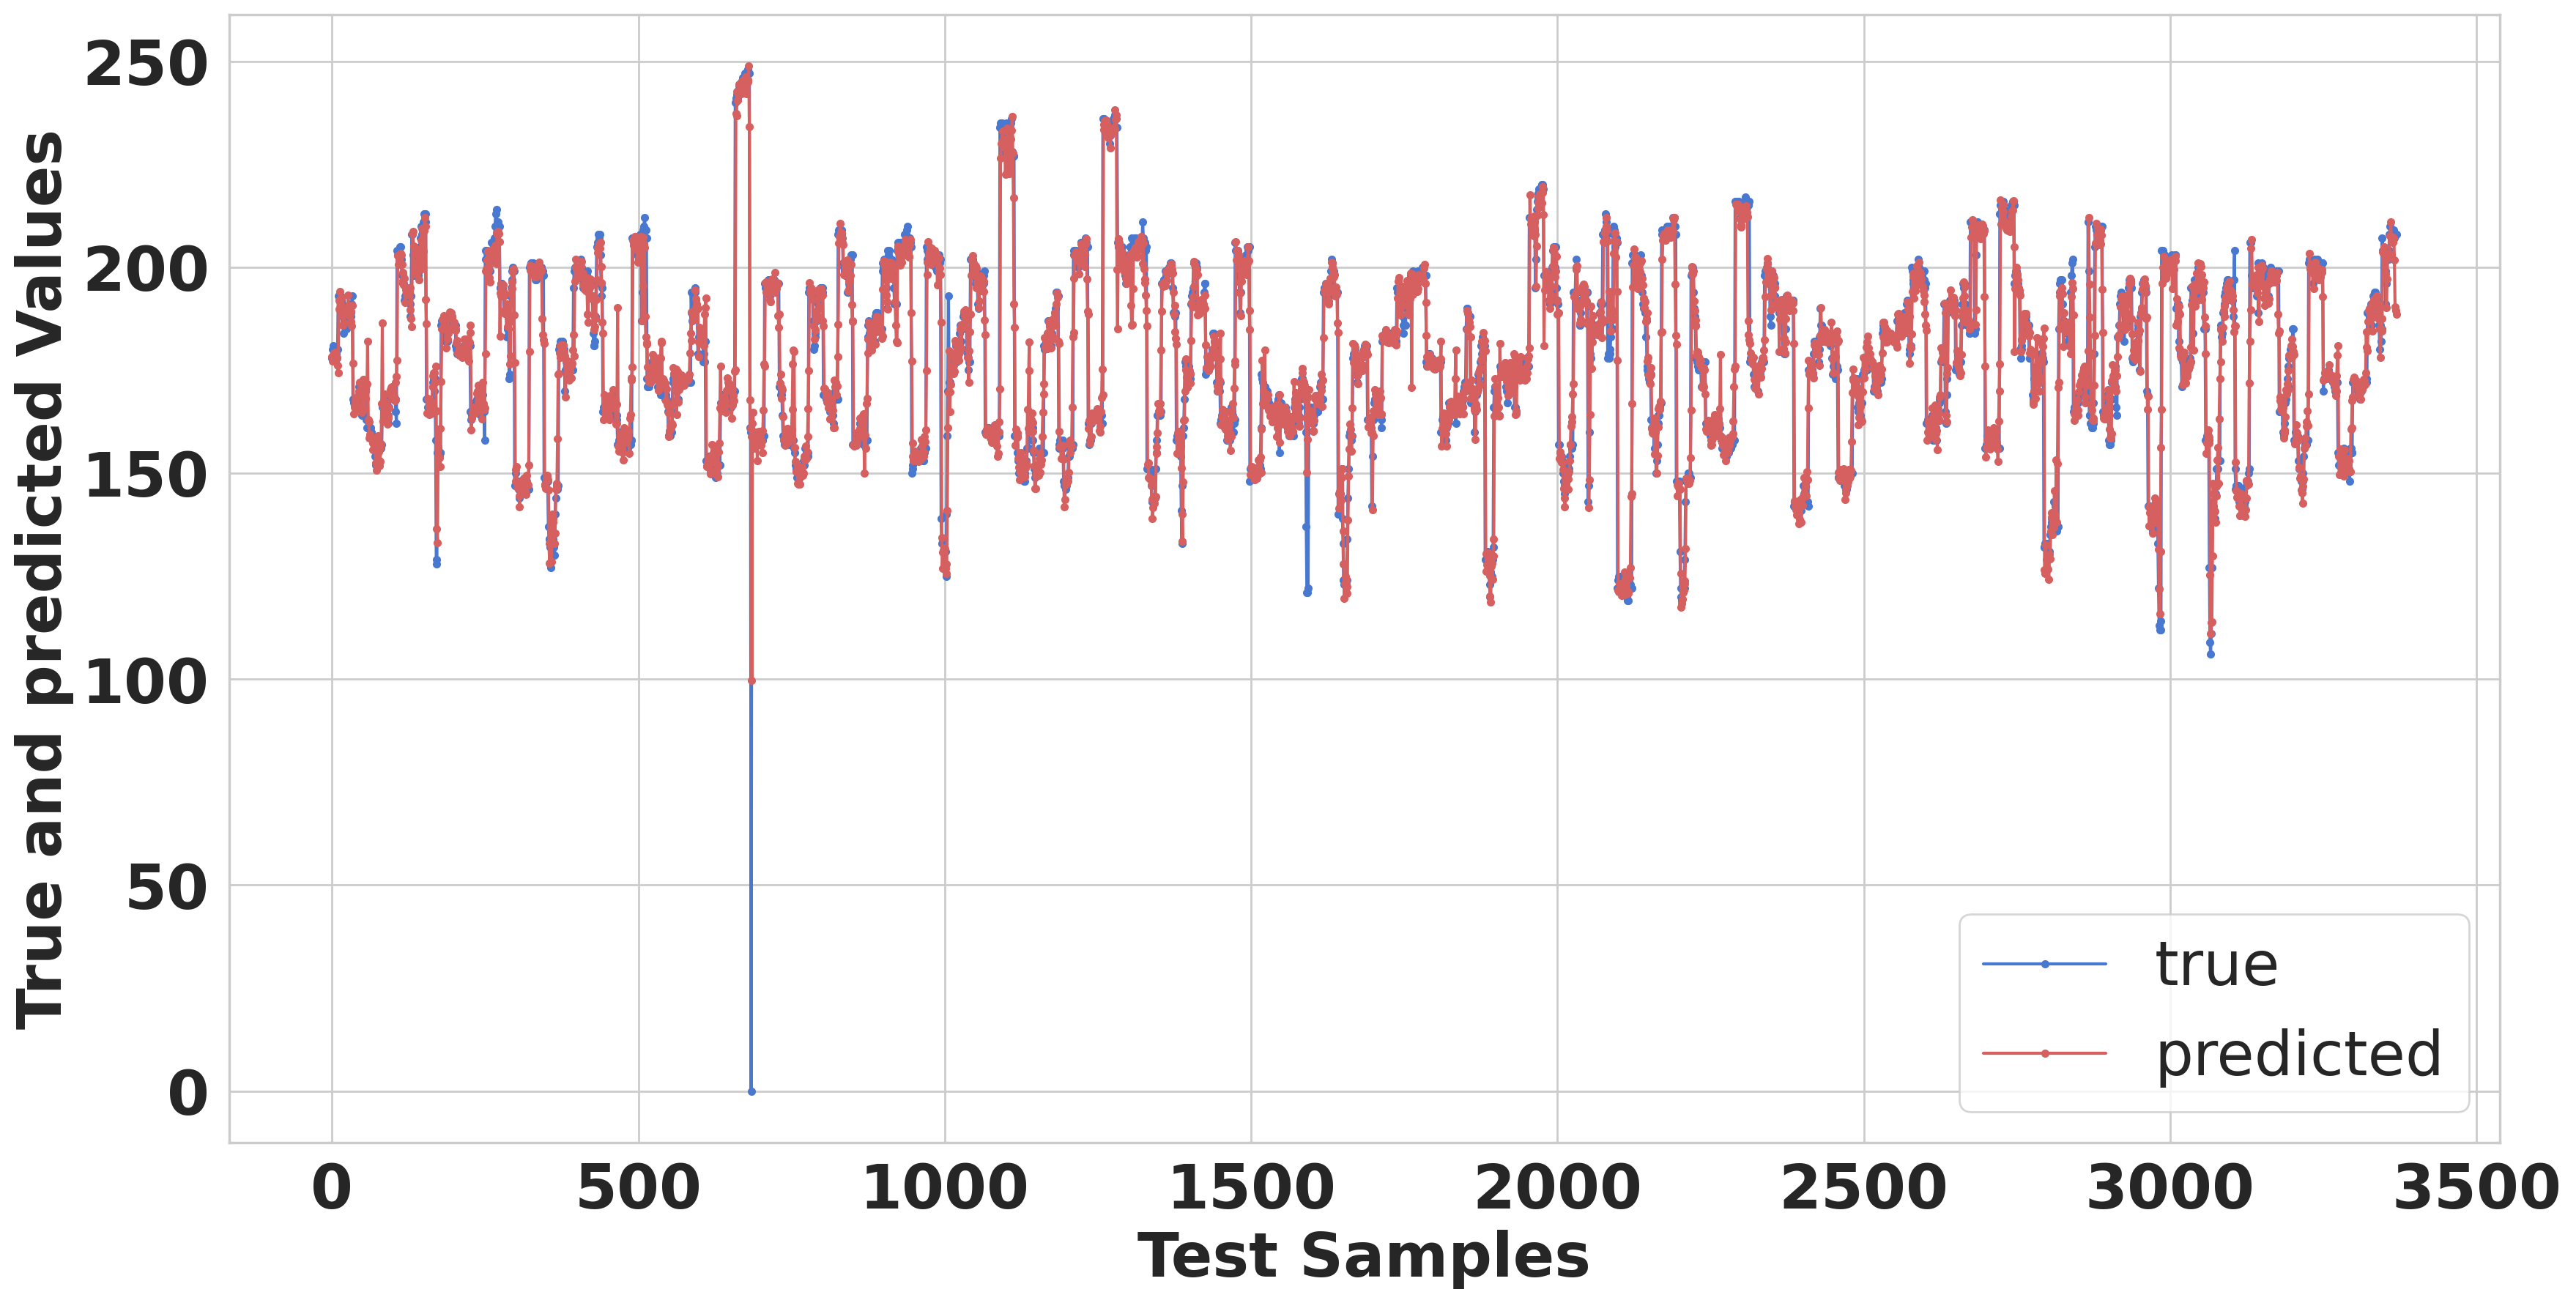

In [27]:
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.plot(y_pred_inv.flatten(), 'r', marker='.', label='predicted')
plt.xlabel('Test Samples', fontsize=30, fontweight='bold')
plt.ylabel('True and predicted Values', fontsize=30, fontweight='bold')
plt.legend( fontsize =30)
from pylab import *

fontsize = 30
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.savefig('/content/drive/MyDrive/capstone/forecast/forecast/7.pdf', dpi=300)